Original image size: 313x161
Image mode is: RGB


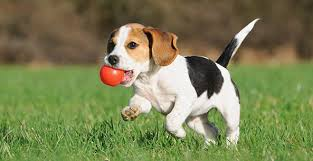

In [1]:
from PIL import Image

im = Image.open("./samples/dog.jpg")
w, h = im.size
print('Original image size: %sx%s' % (w, h))
print('Image mode is: %s' % im.mode)

import IPython.display
listOfImageNames = ['./samples/dog.jpg']

for imageName in listOfImageNames:
    IPython.display.display(IPython.display.Image(filename=imageName))

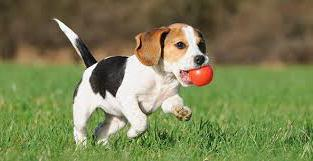

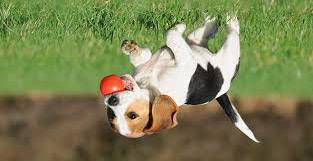

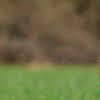

In [2]:
out_hf = im.transpose(Image.FLIP_LEFT_RIGHT)
out_vf = im.transpose(Image.FLIP_TOP_BOTTOM)
out_hf.save("./outputs/dog_hf.jpg")
out_vf.save("./outputs/dog_vf.jpg")
box = (0, 0, 100, 100)
region = im.crop(box)
region.save("./outputs/dog_crop.jpg")

import IPython.display
listOfImageNames = ['./outputs/dog_hf.jpg',
                    './outputs/dog_vf.jpg',
                    './outputs/dog_crop.jpg']

for imageName in listOfImageNames:
    IPython.display.display(IPython.display.Image(filename=imageName))

In [3]:
import numpy as np

region_np = np.array(region)
print('Data type is:', region_np.dtype)
w, h, c = region_np.shape
print('Original image size: %sx%sx%s' % (w, h, c))


Data type is: uint8
Original image size: 100x100x3


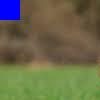

In [6]:
region_np[0:20, 0:20] = np.array([0, 0, 255])
region_new = Image.fromarray(np.uint8(region_np))
region_new.save("./outputs/dog_crop_new.jpg")

import IPython.display
listOfImageNames = ["./outputs/dog_crop_new.jpg"]

for imageName in listOfImageNames:
    IPython.display.display(IPython.display.Image(filename=imageName))

Original image size: 326x326
Upsampled image size: 407x407


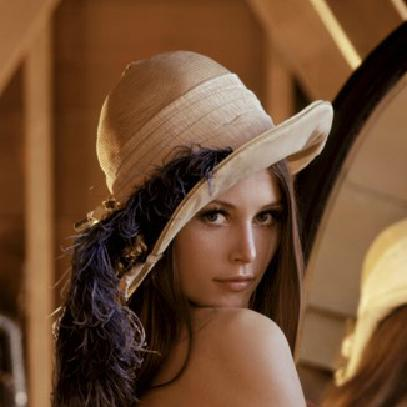

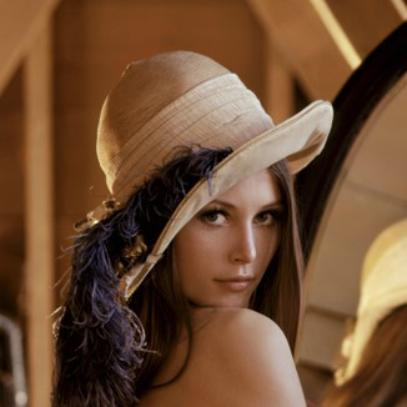

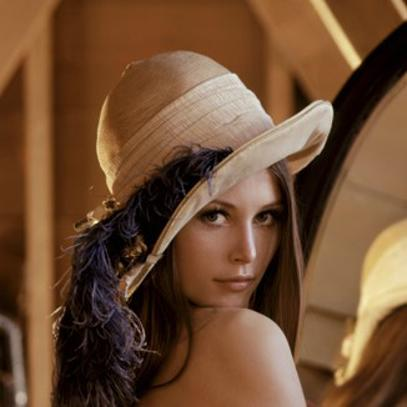

In [20]:
im = Image.open('./samples/lenna.jpg')
w, h = im.size
print('Original image size: %sx%s' % (w, h))
up_factor = 1.25
def int_up(x):
    return int(x * up_factor)

im_up_nn = im.resize((int_up(w), int_up(h)), resample=Image.NEAREST)
im_up_bl = im.resize((int_up(w), int_up(h)), resample=Image.BILINEAR)
im_up_bc = im.resize((int_up(w), int_up(h)), resample=Image.BICUBIC)
w, h = im_up_nn.size
print('Upsampled image size: %sx%s' % (w, h))
im_up_nn.save('./outputs/lenna_up_nn.jpg')
im_up_bl.save('./outputs/lenna_up_bl.jpg')
im_up_bc.save('./outputs/lenna_up_bc.jpg')

import IPython.display
listOfImageNames = ['./outputs/lenna_up_nn.jpg',
                    './outputs/lenna_up_bl.jpg',
                    './outputs/lenna_up_bc.jpg']

for imageName in listOfImageNames:
    IPython.display.display(IPython.display.Image(filename=imageName))

Original image size: 326x326
Downsampled image size: 81x81


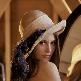

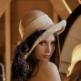

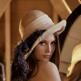

In [21]:
im = Image.open('./samples/lenna.jpg')
w, h = im.size
print('Original image size: %sx%s' % (w, h))
down_factor = 4
im_up_nn = im.resize((w//down_factor, h//down_factor), resample=Image.NEAREST)
im_up_bl = im.resize((w//down_factor, h//down_factor), resample=Image.BILINEAR)
im_up_bc = im.resize((w//down_factor, h//down_factor), resample=Image.BICUBIC)
w, h = im_up_nn.size
print('Downsampled image size: %sx%s' % (w, h))
im_up_nn.save('./outputs/lenna_down_nn.jpg')
im_up_bl.save('./outputs/lenna_down_bl.jpg')
im_up_bc.save('./outputs/lenna_down_bc.jpg')

import IPython.display
listOfImageNames = ['./outputs/lenna_down_nn.jpg',
                    './outputs/lenna_down_bl.jpg',
                    './outputs/lenna_down_bc.jpg']

for imageName in listOfImageNames:
    IPython.display.display(IPython.display.Image(filename=imageName))

Original image size: 326x326
Size without expansion: 326x326
Size with expansion: 446x446


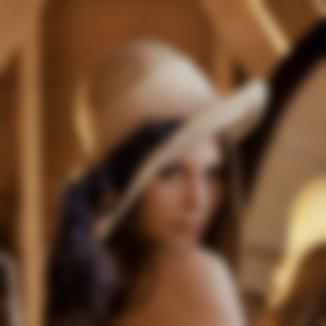

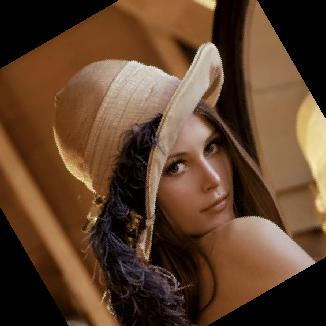

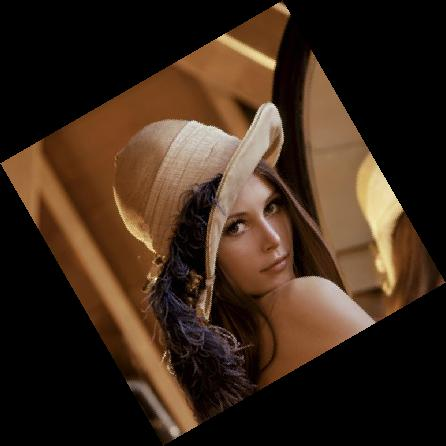

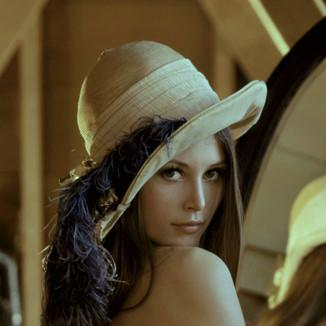

In [22]:
import numpy as np
from PIL import Image
from PIL import ImageFilter
im = Image.open('./samples/lenna.jpg')
w, h = im.size
print('Original image size: %sx%s' % (w, h))
im_gaussian = im.filter(ImageFilter.GaussianBlur(radius=5))
im_rotated_0 = im.rotate(30, expand=0)
im_rotated_1 = im.rotate(30, expand=1)
im_np = np.array(im).astype(np.float32)
im_np[:, :, 0] = im_np[:, :, 0] * 0.8
im_jittered = Image.fromarray(np.uint8(im_np))
im_gaussian.save('./outputs/lenna_gaussian.jpg')
im_rotated_0.save('./outputs/lenna_rotated_0.jpg')
im_rotated_1.save('./outputs/lenna_rotated_1.jpg')
im_jittered.save('./outputs/lenna_jittered.jpg')
w, h = im_rotated_0.size
print('Size without expansion: %sx%s' % (w, h))
w, h = im_rotated_1.size
print('Size with expansion: %sx%s' % (w, h))

import IPython.display
listOfImageNames = ['./outputs/lenna_gaussian.jpg',
                    './outputs/lenna_rotated_0.jpg',
                    './outputs/lenna_rotated_1.jpg', 
                    './outputs/lenna_jittered.jpg']

for imageName in listOfImageNames:
    IPython.display.display(IPython.display.Image(filename=imageName))